|   Model A  | Predicted Dog | Predicted Cat |
|:----------:|:-------------:|:-------------:|
| Actual Dog |       30      |       20      |
| Actual Cat |       10      |       40      |  

**T1.** $\text{Accuracy}= \dfrac{30+40}{30+20+10+40}=70\%$  
  

**T2.** Consider cat as class 1  
  
$\text{Precision} =\dfrac{40}{20 + 40} = 66.67\%$  
  
$\text{Recall} =\dfrac{40}{10 + 40} = 80\%$  
    
$\text{F1} = 2 \cdot \dfrac{precision \cdot recall}{precision + recall} = 2 \cdot \dfrac{0.6667 \cdot 0.8}{0.6667 + 0.8}=0.7273$
  

**T3.** Consider class cat as class 0  
  
$Precision =\dfrac{30}{30 + 10} = 75\%$  
  
$\text{Recall} =\dfrac{30}{30 + 20} = 60\%$  
    
$F1 = 2 \cdot \dfrac{precision \cdot recall}{precision + recall} = 2 \cdot \dfrac{0.75 \cdot 0.6}{0.75 + 0.6}=0.6667$
   

**T4.** Same model with a new population with 80% cat, consider dog as positive class.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Find accuracy, precision, recall, and F1 score of a model.  
  
Let $x$ is number of new population.  
Assume that recall of each class does not change (since it's the most make sense for the same model)  
<!-- |   Model A  | Predicted Dog | Predicted Cat |
|:----------:|:-------------:|:-------------:|
| Actual Dog |       $0.6 \cdot 0.2x$      |       $0.4 \cdot 0.2x$      |
| Actual Cat |       $0.2 \cdot 0.8x$      |       $0.8 \cdot 0.8x$      |    -->
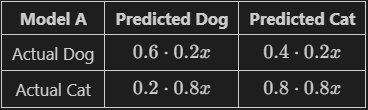  

$\text{Accuracy} = \dfrac{0.6\cdot0.2x+0.8 \cdot 0.8x}{x}=76\%$
  
$\text{Precision} =\dfrac{0.6 \cdot 0.2x}{0.6 \cdot 0.2x + 0.2 \cdot 0.8x} = 42.86\%$  
  
$\text{Recall} =\dfrac{0.6 \cdot 0.2x}{0.6 \cdot 0.2x + 0.4 \cdot 0.2x} = 60\%$  
    
$\text{F1} = 2 \cdot \dfrac{precision \cdot recall}{precision + recall} = 2 \cdot \dfrac{0.4286 \cdot 0.6}{0.4286 + 0.6}=0.5000$  
  

**OT1.** let $\text{Accuracy} = \text{F1}$
$$ \dfrac{TP+TN}{TP+TN+FP+FN} = \dfrac{2TP}{2TP+FP+FN}$$
$$2TP^2+2TPTN+FPTP+FPTN+FNTP+FNTN = 2TP^2+2TPTN+2TPFP+2TPFN$$
$$FPTN+FNTN = FPTP+FNTP$$
$$TN(FP+FN) = TP(FP+FN)$$
$$TN = TP$$  
$\therefore \text{Accuracy will be equal F1 when } TN=TP$  
Same go as greater and less, since all value is positive in inequality.  
$\therefore \text{Accuracy will be greater F1 when } TN>TP$  
$\therefore \text{Accuracy will be less F1 when } TN<TP$  
  

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Given data point
x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
y = np.array([2, 3, 2, 8, 6, 7, -3, -4, -7])
ar = np.array([
    [1, 2],
    [3, 3],
    [2, 2],
    [8, 8],
    [6, 6],
    [7, 7],
    [-3, -3],
    [-2, -4],
    [-7, -7],
])
# df.rename({0: 'x', 1: 'y'}, axis=1, inplace=True)
ar

array([[ 1,  2],
       [ 3,  3],
       [ 2,  2],
       [ 8,  8],
       [ 6,  6],
       [ 7,  7],
       [-3, -3],
       [-2, -4],
       [-7, -7]])

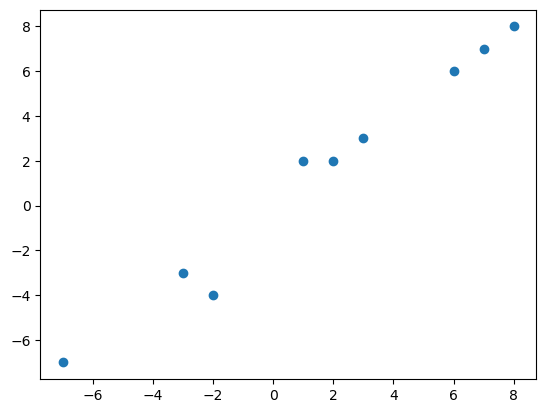

In [30]:
plt.scatter(x, y)

In [31]:
# color for plotting
pcolor = ['#e88484', '#8de884', '#8991e8']
ccolor = ['#ff0000', '#17f502', '#0216f5']

In [32]:
class Kmean():
    def __init__(self, k, stpnt):
        self.k = k
        self.stpnt = np.array(stpnt)

    def assign_points(self, X, centroids):
        # print("Assign points")
        clusters = [[] for i in range(self.k)]
        for p in X:
            cen = np.argmin(np.linalg.norm(centroids-p, axis=1)) # Euclidian distance
            clusters[cen].append(p)
        # for i, cl in enumerate(clusters):
        #     print("cluster", i, ": ", end="")
        #     for p in cl:
        #         print(f"({p[0]}, {p[1]})", end=", ")
        #     print('')
        return clusters

    def update_centroid(self, clusters):
        # print("Update centroids")
        centroids = np.array([[0, 0] for i in range(self.k)])
        for i, cl in enumerate(clusters):
            centroids[i] = np.mean(cl, axis=0)
        # for i, cen in enumerate(centroids):
        #     print("centroid", i, ": ", f"({cen[0]},{cen[1]})")
        return centroids

    def fit(self, X):
        new_centroids = np.array(self.stpnt)
        centroids = np.zeros(self.k)
        i = 1
        while not np.array_equal(new_centroids, centroids):
            centroids = new_centroids
            # print('epoch :',i)
            i += 1
            clusters = self.assign_points(X, centroids)
            new_centroids = self.update_centroid(clusters)
        return clusters, centroids



        


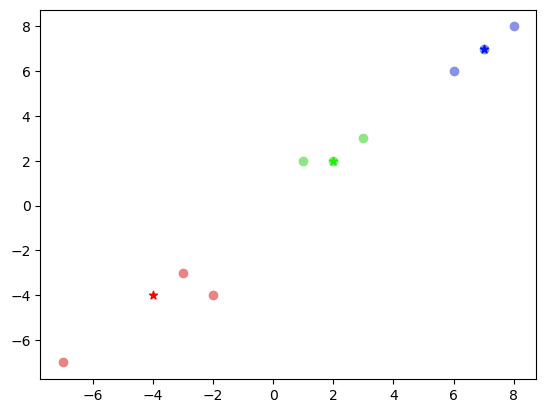

In [33]:
# T5 model: starting point at [-3, -3], [2, 2], [3, 3]
model = Kmean(3, [[-3, -3], [2, 2], [3, 3]])
clusters, centroids = model.fit(ar)
for i, cl in enumerate(clusters):
            color = pcolor[i]
            for p in cl:
                plt.scatter(p[0], p[1], color = color)
for i, cen in enumerate(centroids):
            color = ccolor[i]
            plt.scatter(cen[0], cen[1], color = color, marker='*')
plt.show()
# stars are centroids

**T5**:  
epoch : 1  
Assign points  
cluster 0 : (-3, -3), (-2, -4), (-7, -7)  
cluster 1 : (1, 2), (2, 2)   
cluster 2 : (3, 3), (8, 8), (6, 6), (7, 7)   
Update centroids  
centroid 0 :  (-4, -4)  
centroid 1 :  (1, 2)  
centroid 2 :  (6, 6)  
epoch : 2  
Assign points  
cluster 0 : (-3, -3), (-2, -4), (-7, -7)   
cluster 1 : (1, 2), (3, 3), (2, 2)   
cluster 2 : (8, 8), (6, 6), (7, 7)   
Update centroids  
centroid 0 :  (-4, -4)  
centroid 1 :  (2, 2)  
centroid 2 :  (7, 7)  
epoch : 3  
Assign points  
cluster 0 : (-3, -3), (-2, -4), (-7, -7)   
cluster 1 : (1, 2), (3, 3), (2, 2)   
cluster 2 : (8, 8), (6, 6), (7, 7)   
Update centroids  
centroid 0 :  (-4, -4)  
centroid 1 :  (2, 2)  
centroid 2 :  (7, 7)  
(output from model below)  

**T6**: As seen from visualization below, starting points from T6 model change output centroids.

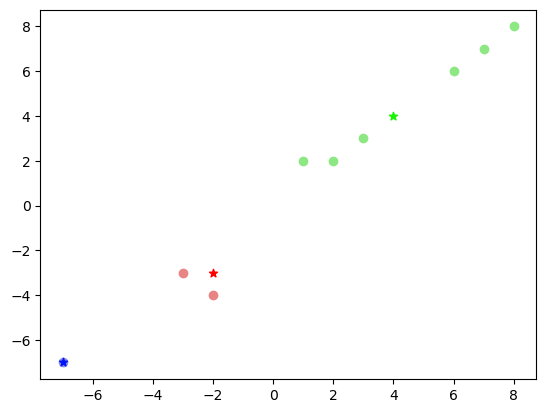

In [34]:
# T6 model
model = Kmean(3, [[-3, -3], [2, 2], [-7, -7]])
clusters, centroids = model.fit(ar)
for i, cl in enumerate(clusters):
            color = pcolor[i]
            for p in cl:
                plt.scatter(p[0], p[1], color = color)
for i, cen in enumerate(centroids):
            color = ccolor[i]
            plt.scatter(cen[0], cen[1], color = color, marker='*')
plt.show()
# stars are centroids

**T7**: T5 one is better, I think 'goodness' of starting points is the less initial between cluster variance.  
  

In [35]:
# OT2
import random
def foevar(k):
    fvars = []
    allcen = np.mean(ar, axis=0)
    for j in range(100):
        clusters, centroids = Kmean(k, random.sample(ar.tolist(), k)).fit(ar)
        btwvar = 0
        allvar = 0
        for i in range(k):
            btwvar += len(clusters[i]) * ((centroids[i][0] - allcen[0]) ** 2 + (centroids[i][1] - allcen[1]) ** 2) /  ar.shape[0]
        for i in range(ar.shape[0]):
            allvar += ((ar[i][0] - allcen[0]) ** 2 + (ar[i][1] - allcen[1]) ** 2) / ar.shape[0]
        frac = btwvar / allvar # fraction of explained variance
        fvars.append(frac)
    return np.mean(fvars)

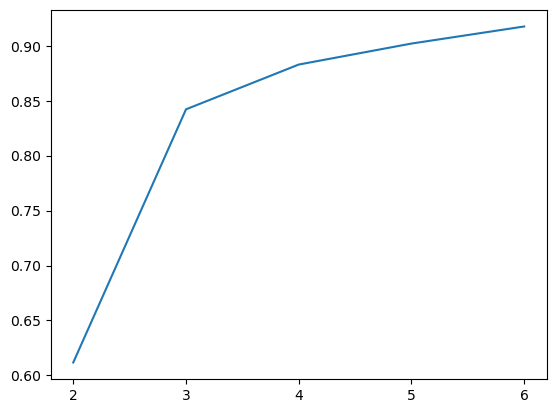

In [36]:
plt.plot([(foevar(i)) for i in range(2, 7)])
plt.xticks(range(5), labels=[str(i + 2) for i in range(5)])
plt.show()

**OT2**: Use Elbow method, The best K is 3.  
  
    

In [37]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [38]:
# T8
median_age = train['Age'].median()
median_age

28.0

**T8**: Median age of training set is 28.0  
   

In [39]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train['Age'].isnull().sum()

0

**T9**:  map Embarked and Sex to numerical value.  

In [40]:
# T9
train['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [41]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Embarked'].value_counts(dropna=False)

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2
train['Embarked'].value_counts(dropna=False)

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [43]:
train['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [44]:
train.loc[train['Sex'] == 'male', 'Sex'] = 0
train.loc[train['Sex'] == 'female', 'Sex'] = 1
train['Sex'].value_counts(dropna=False)

0    577
1    314
Name: Sex, dtype: int64

**T10**: Logistic regression  

In [45]:
# start T10
# Preprocess test data
test['Age'].isnull().sum()

86

In [46]:
test["Age"] = test["Age"].fillna(median_age)
test['Age'].isnull().sum()

0

In [47]:
test['Embarked'].value_counts(dropna=False)

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [48]:
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2
test['Embarked'].value_counts(dropna=False)

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [49]:
test['Sex'].value_counts(dropna=False)

male      266
female    152
Name: Sex, dtype: int64

In [50]:
test.loc[test['Sex'] == 'male', 'Sex'] = 0
test.loc[test['Sex'] == 'female', 'Sex'] = 1
test['Sex'].value_counts(dropna=False)

0    266
1    152
Name: Sex, dtype: int64

In [51]:
train_X = np.array(train[['Pclass', 'Sex', 'Age', 'Embarked']].values, dtype=float)
test_X = np.array(test[['Pclass', 'Sex', 'Age', 'Embarked']].values, dtype=float)
y = np.array(train['Survived'].values, dtype=float)

In [52]:
# normalize data
mx = np.max(train_X, axis=0)
mn = np.min(train_X, axis=0)
X_norm = (train_X - mn) / (mx - mn)
X_test_norm = (test_X - mn) / (mx - mn)
X_norm

array([[1.        , 0.        , 0.27117366, 0.        ],
       [0.        , 1.        , 0.4722292 , 0.5       ],
       [1.        , 1.        , 0.32143755, 0.        ],
       ...,
       [1.        , 1.        , 0.34656949, 0.        ],
       [0.        , 0.        , 0.32143755, 0.5       ],
       [1.        , 0.        , 0.39683338, 1.        ]])

In [53]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# T10
class LogisticRegression():
    def __init__(self, lnr, epoch):
        self.lnr = lnr
        self.epoch = epoch
        self.theta = None # weight
    
    def fit(self, X, y):
        n_samples, n_attr = X.shape
        self.theta = np.zeros(n_attr)
        accl = []
        for _ in range(self.epoch):
            y_pred = sigmoid(np.dot(X, self.theta))
            self.theta = self.theta - self.lnr * (np.dot(X.T, (y_pred - y))) / n_samples
            acc = self.accuracy(X, y)
            accl.append(acc)
        plt.plot(accl)
            
    def predict(self, X):
        y_pred = sigmoid(np.dot(X, self.theta))
        return [0 if yi <= 0.5 else 1 for yi in y_pred]
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)


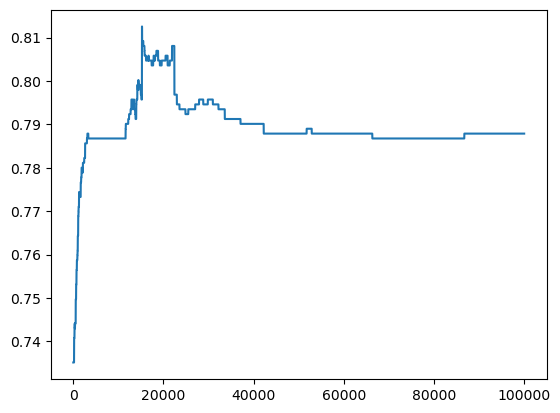

In [71]:
model = LogisticRegression(0.001, 100000)
model.fit(X_norm, y)

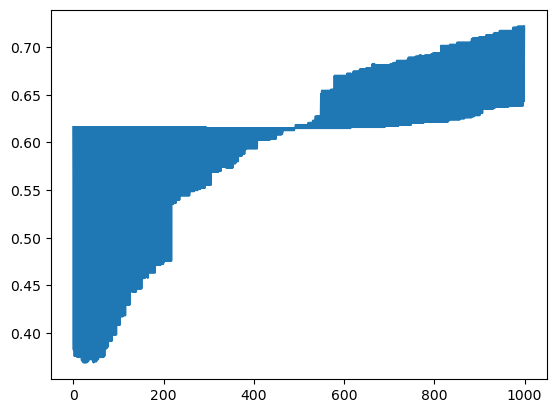

In [55]:
#TEMP
model.fit(train_X, y)

In [56]:
print('Training accuracy: ', model.accuracy(X_norm, y))

Training accuracy:  0.7497194163860831


In [57]:
pred = model.predict(X_test_norm)
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred})
output.to_csv('hw1_normalized.csv', index=False)

**T11**:  
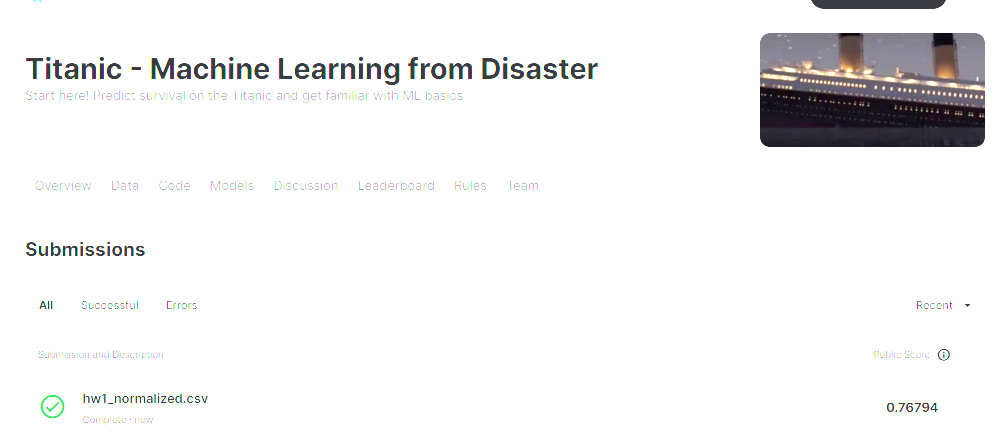

In [58]:
# TEMP
age_sq = train['Age'] ** 2
# mx = np.max(age_sq, axis=0)
# mn = np.min(age_sq, axis=0)
# age_sq = (age_sq - mn) / (mx - mn)
highorder_X = np.insert(X_norm, 4, age_sq, axis=1)
age_sq_test = test['Age'] ** 2
# mx = np.max(age_sq_test, axis=0)
# mn = np.min(age_sq_test, axis=0)
# age_sq_test = (age_sq_test - mn) / (mx - mn)
X_test_highorder = np.insert(X_test_norm, 4, age_sq_test, axis=1)

C:\Users\Tonza\AppData\Local\Temp\ipykernel_3852\3742623006.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


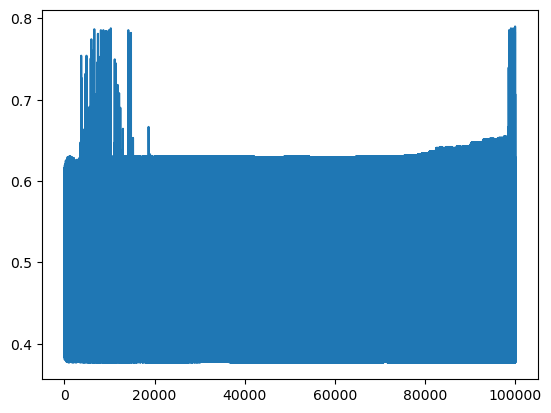

In [59]:
model2 = LogisticRegression(0.01, 100000)
model2.fit(highorder_X, y)

In [60]:
# T12: add high order feature
age_sq = train['Age'] ** 3
mx = np.max(age_sq, axis=0)
mn = np.min(age_sq, axis=0)
age_sq = (age_sq - mn) / (mx - mn)
highorder_X = np.insert(X_norm, 4, age_sq, axis=1)
age_sq_test = test['Age'] ** 3
mx = np.max(age_sq_test, axis=0)
mn = np.min(age_sq_test, axis=0)
age_sq_test = (age_sq_test - mn) / (mx - mn)
X_test_highorder = np.insert(X_test_norm, 4, age_sq_test, axis=1)

In [61]:
highorder_X

array([[1.        , 0.        , 0.27117366, 0.        , 0.02079673],
       [0.        , 1.        , 0.4722292 , 0.5       , 0.10717175],
       [1.        , 1.        , 0.32143755, 0.        , 0.03432799],
       ...,
       [1.        , 1.        , 0.34656949, 0.        , 0.04287486],
       [0.        , 0.        , 0.32143755, 0.5       , 0.03432799],
       [1.        , 0.        , 0.39683338, 1.        , 0.06399986]])

Training accuracy with high order attribute:  0.7934904601571269


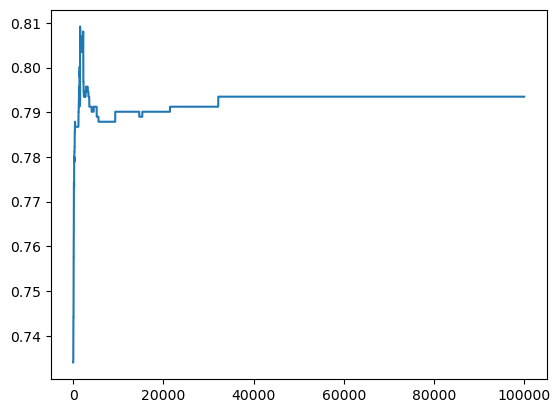

In [62]:
model2 = LogisticRegression(0.01, 100000)
model2.fit(highorder_X, y)
print('Training accuracy with high order attribute: ', model2.accuracy(highorder_X, y))

In [63]:
pred2 = model2.predict(X_test_highorder)
output2 = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred2})
output2.to_csv('highorder.csv', index=False)

Score on kaggle: 0.76794  
**T12**: It got slightly more training accuracy, but perform as good as the old one in test set.  

0.7789001122334456

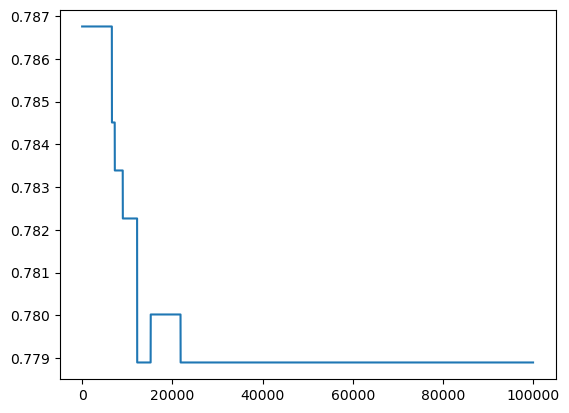

In [64]:
# T13: Use just sex and age
model3 = LogisticRegression(0.01, 100000)
X_3 = X_norm[:, 1 : 3] # Sex and Age
X_3_test = X_test_norm[:, 1 : 3]
model3.fit(X_3, y)
model3.accuracy(X_3, y)

In [65]:
pred3 = model3.predict(X_3_test)
output3 = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': pred3})
output3.to_csv('sex_age.csv', index=False)

Score on kaggle: 0.75119  
**T13**: got slightly lower accuracy than use 4 attributes in T11.

**OT3**:  Linear regression with gradient descent.  

In [66]:
class LinearRegression():
    def __init__(self, lnr, epoch):
        self.lnr = lnr
        self.epoch = epoch
        self.theta = None # weight
    
    def fit(self, X, y):
        n_samples, n_attr = X.shape
        self.theta = np.zeros(n_attr)
        for _ in range(self.epoch):
            y_pred = np.dot(X, self.theta)
            self.theta = self.theta - self.lnr * (np.dot(X.T, (y_pred - y))) / n_samples
            
    def predict(self, X):
        y_pred = np.dot(X, self.theta)
        return [0 if yi <= 0.5 else 1 for yi in y_pred]
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def weight(self):
        return self.theta

In [67]:
linear_gradient = LinearRegression(0.01, 100000)
linear_gradient.fit(X_norm, y)
print('Training accuracy:', linear_gradient.accuracy(X_norm, y))

Training accuracy: 0.7867564534231201


**OT4**:  Linear regression with matrix inversion.  

In [68]:
class MatrixInversion():
    def __init__(self):
        self.theta = None # weight
    
    def fit(self, X, y):
        self.theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
            
    def predict(self, X):
        y_pred = np.dot(X, self.theta)
        return [0 if yi <= 0.5 else 1 for yi in y_pred]
    
    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)
    
    def weight(self):
        return self.theta

In [69]:
linear_inversion = MatrixInversion()
linear_inversion.fit(X_norm, y)
print('Training accuracy:', linear_inversion.accuracy(X_norm, y))

Training accuracy: 0.7867564534231201


In [70]:
print('MSE of two weight =', np.sum((linear_gradient.weight() - linear_inversion.weight()) ** 2))

MSE of two weight = 3.914473604603451e-27


which means weights learned from the two methods is similar.  